# Mobile Price Classification

## Problem Statement

Market size of mobile phones if growing everyday and so is the competition.To capture the maximum market electronics companies try to make improvements in their products. However, sales of mobile phones depend on various factors like demand, technology, marketing, brand, availability, user experience, service, price, etc. As we understand that selling price makes a huge difference when it comes to sales and profits. 
Estimating an optimal price for a new mobile phone can be a tricky task especially when you are new in the business or when you want to launch a new kind of mobile phone in the market. 

As part of this exercise we will try to estimate the price range for a given mobile phone using given feature information. These details are collected from various similar companies.  

#### Attribute Information

1. id : ID
2. battery_power : Total energy a battery can store in one time measured in mAh
3. blue : Has bluetooth or not
4. clock_speed : speed at which microprocessor executes instructions
5. dual_sim : Has dual sim support or not
6. fc : Front Camera megapixels
7. four_g : Has 4G or not
8. int_memory : Internal Memory in Gigabytes
9. m_dep : Mobile Depth in cm
10. mobile_wt : Weight of mobile phone
11. n_cores : Number of cores of processor
12. pc : Primary Camera mega pixels
13. px_height: Pixel Resolution Height
14. px_width: Pixel Resolution Width
15. ram: Random Access Memory in Megabytes
16. sc_h : Screen Height of mobile in cm
17. sc_w : Screen Width of mobile in cm
18. talk_time : longest time that a single battery charge will last when you are
19. three_g : Has 3G or not
20. touch_screen : Has touch screen or not
21. wifi : Has wifi or not
22. price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Table of Content

1.Import Libraries


2.Setting options


3.Read Data


4.Data Analysis and Preparation

4.1 - Understanding the Dataset

    4.1.1 - Data Types

    4.1.2 - Summary Statistics

    4.1.3 - Missing Value check

    4.1.4 - Discover Outliers with Visualization

5. Univariate Analysis

6. Multivariate Analysis
   6.1 - Visualizing features having strongest relation with target variable

7. Creating Logistic Regression Model

8. Standardizing the data

9. Conclusion and Interpretation


### Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from scipy.stats import zscore

### Setting Options

In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [5]:
df = pd.read_csv('Mobile.csv')

### Data Analysis and Preparation

In [6]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [7]:
df.shape

(2000, 21)

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no missing values.

In [11]:
df.duplicated().sum()

0

There are no duplicate values.

#### Summary Statistics

In [13]:
df.describe().transpose()

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

Checking Ouliers

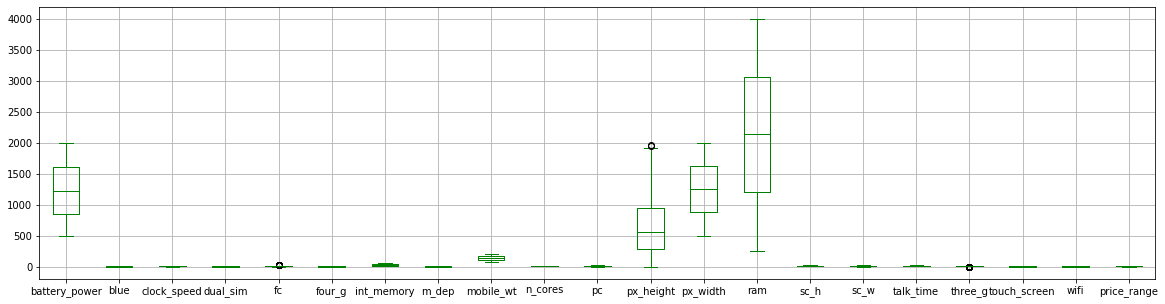

In [16]:
df.boxplot(figsize=(20,5),color = 'green')

In [19]:
#Number of outliers
col_val = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
for i in col_val:
    print('No. of outliers in {} is {}'.format(i, df[((df[i]-df[i].mean())/df[i].std()).abs() > 3][i].count()))

No. of outliers in battery_power is 0
No. of outliers in blue is 0
No. of outliers in clock_speed is 0
No. of outliers in dual_sim is 0
No. of outliers in fc is 12
No. of outliers in four_g is 0
No. of outliers in int_memory is 0
No. of outliers in m_dep is 0
No. of outliers in mobile_wt is 0
No. of outliers in n_cores is 0
No. of outliers in pc is 0
No. of outliers in px_height is 0
No. of outliers in px_width is 0
No. of outliers in ram is 0
No. of outliers in sc_h is 0
No. of outliers in sc_w is 0
No. of outliers in talk_time is 0
No. of outliers in three_g is 0
No. of outliers in touch_screen is 0
No. of outliers in wifi is 0
No. of outliers in price_range is 0


There are very less outliers in dataset.

In [17]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

### Univariate Analysis

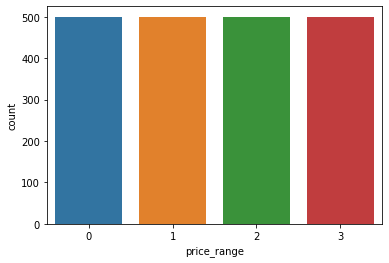

In [23]:
sns.countplot(df['price_range'])

In [24]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

### Multivariate Analysis

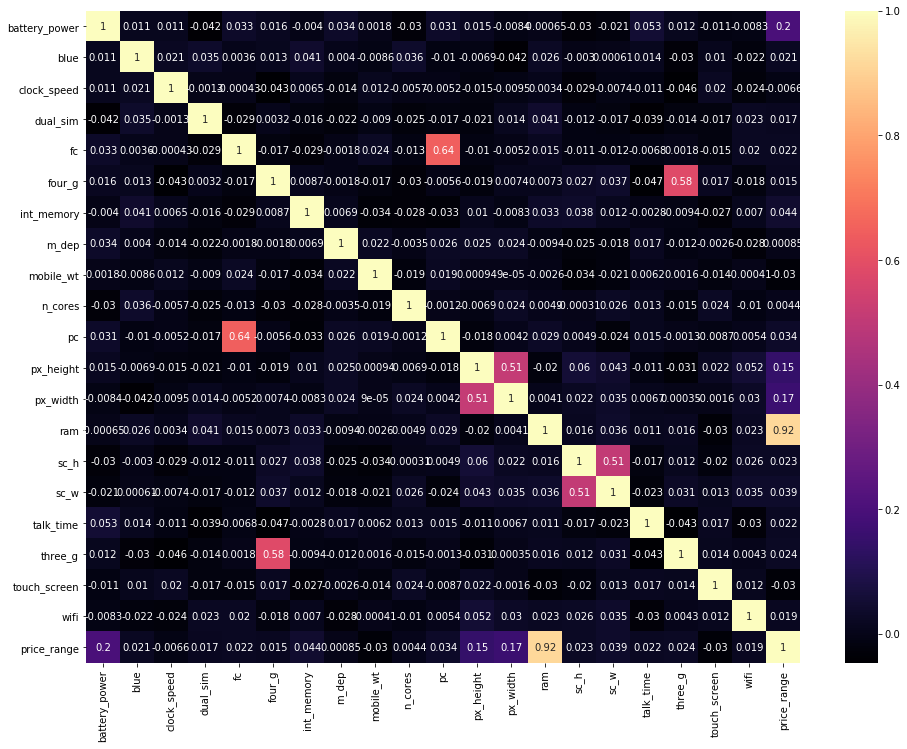

In [36]:
#chekcing correlation between independent varaibles
cor = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels= cor.columns,annot= True,cmap='magma')

### Observations

1. We can see that ram is highly correlated with price range
2. four_g and three_g also have some relationship
3. pc ( primary camera) and fc (front camera) are also related
4. Most of the features are not corelated to each other
5. Few features like clock_speed, m_dep, n_cross are not having much relationship with price range and can be dropped

Note : We can see as RAM increases price also increases.

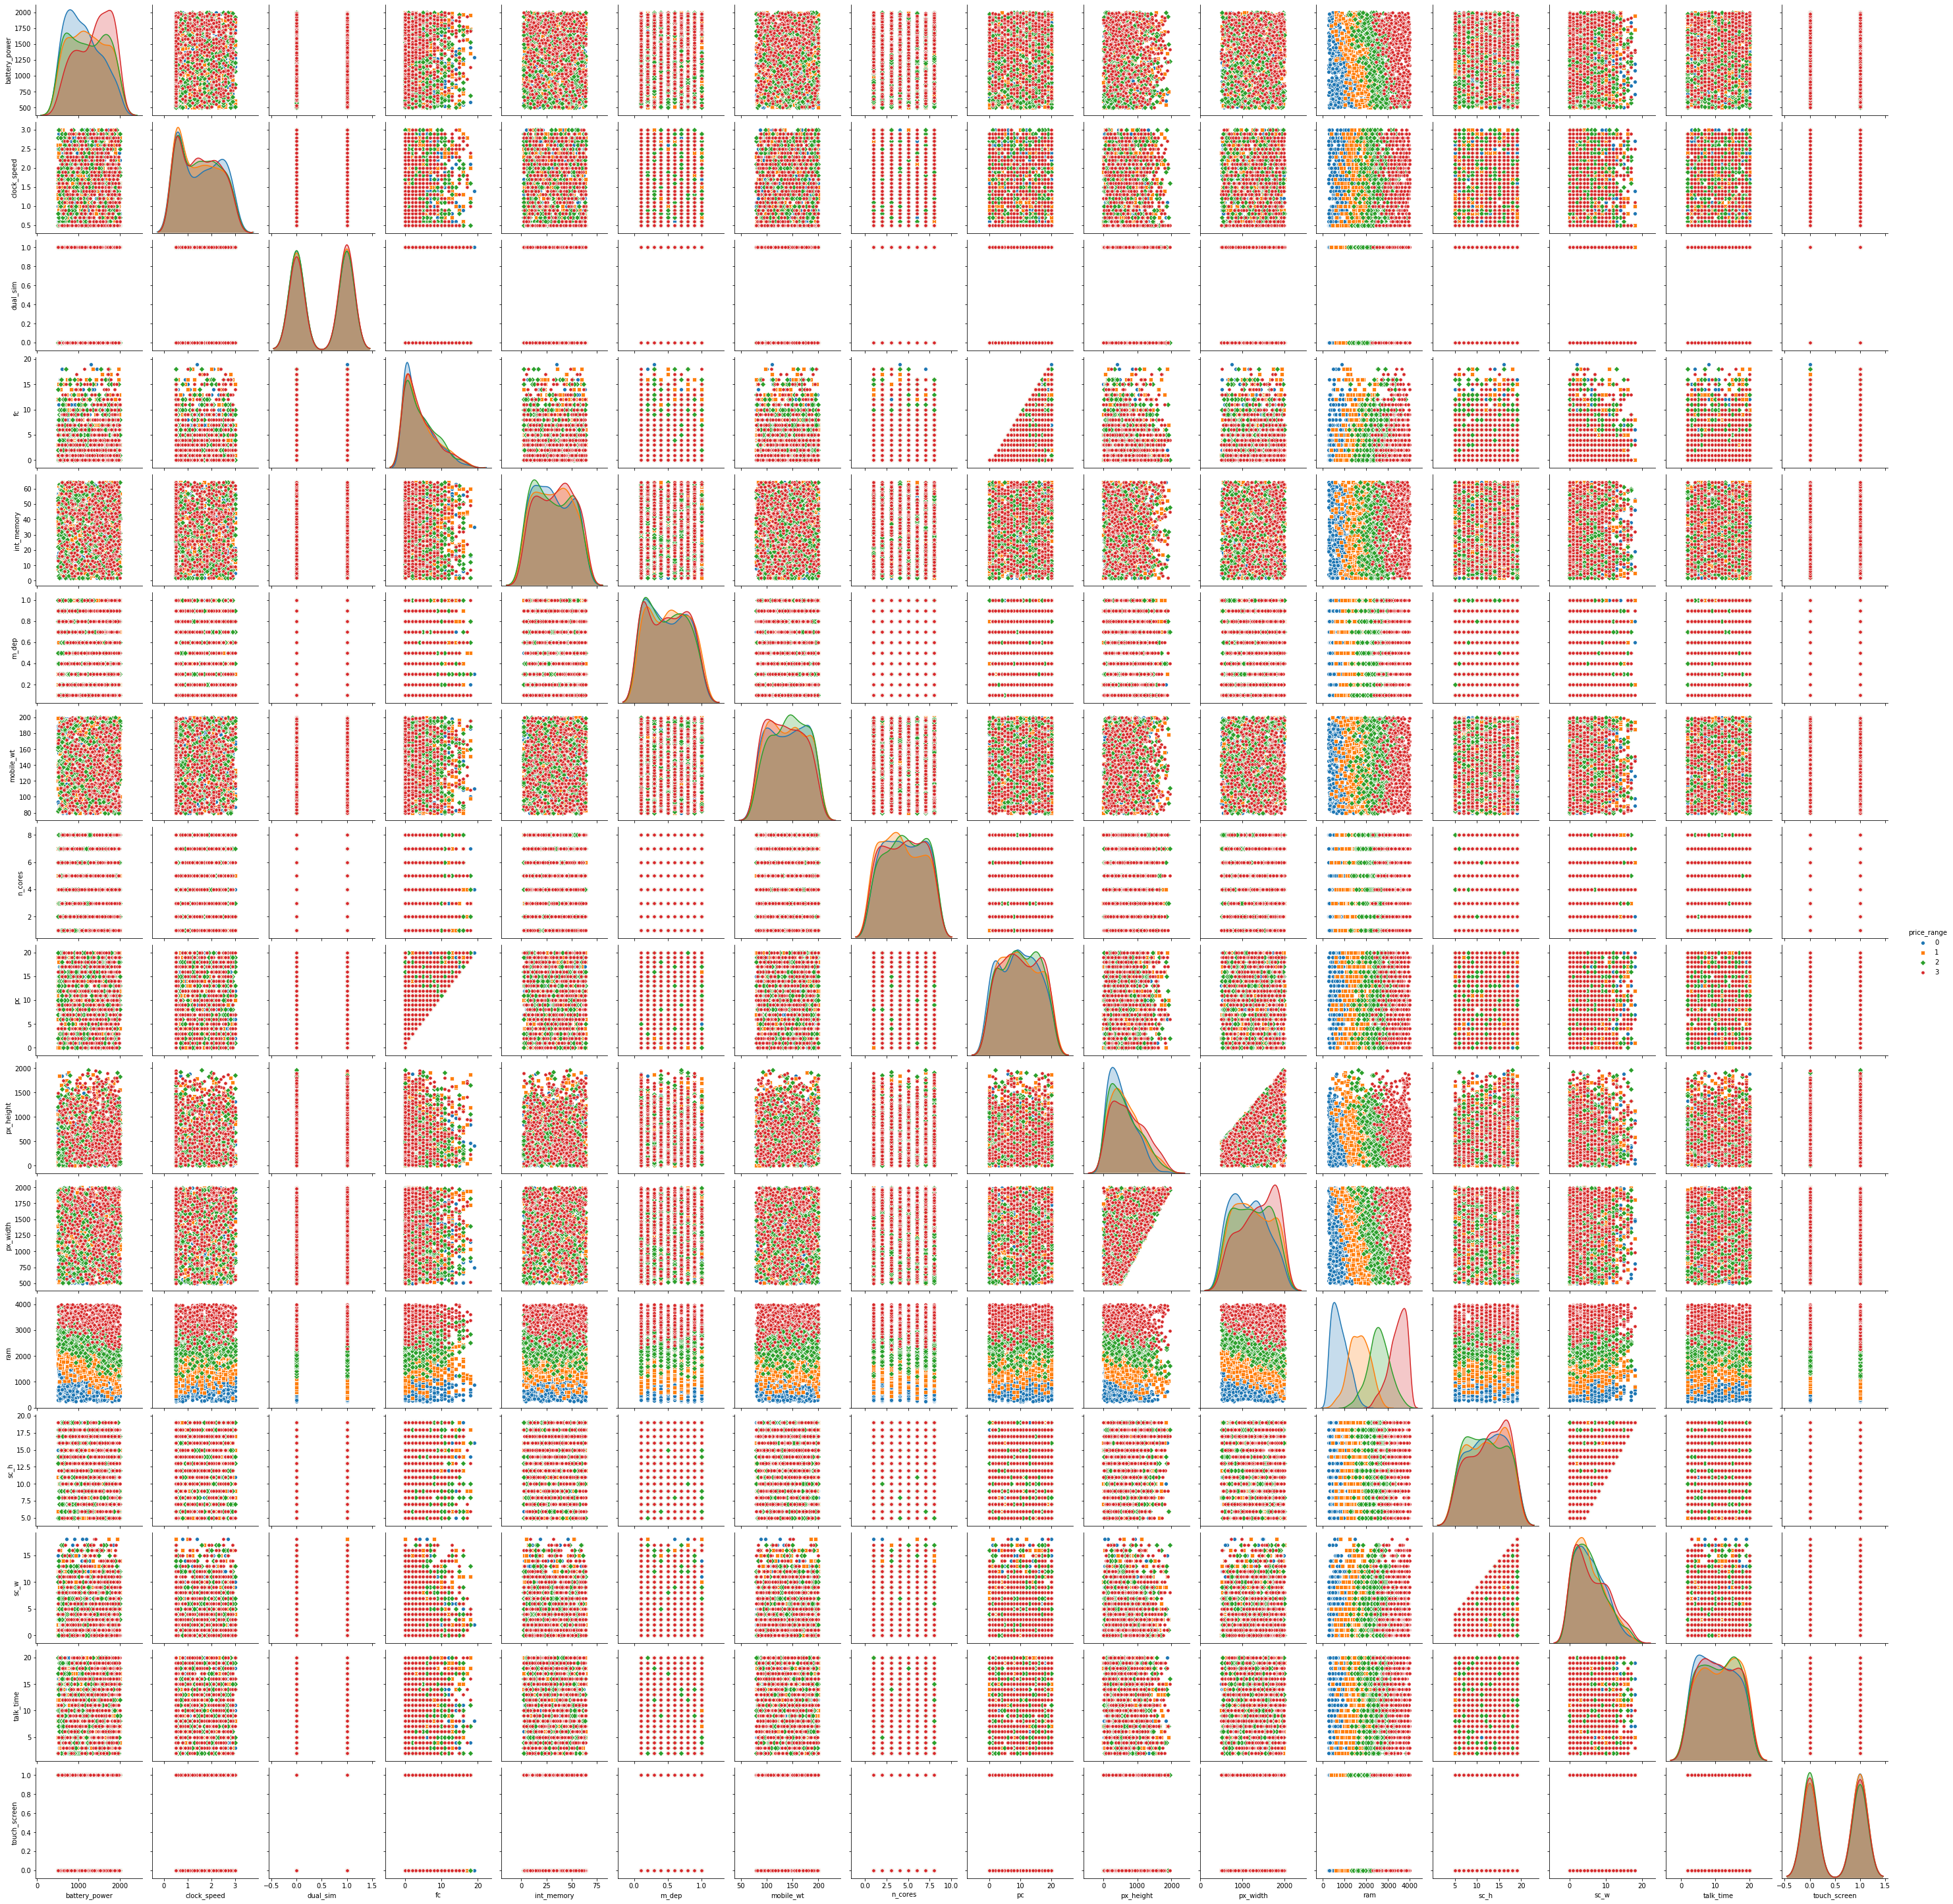

In [37]:
# Check pairplot

dff = df[['battery_power', 'clock_speed', 'dual_sim', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 
       'touch_screen', 'price_range']]

sns.pairplot(dff, diag_kind='kde', hue = 'price_range' , markers=["o", "s", "D","h"])
plt.show()

### Splitting dataset

In [42]:
#Independent Variables
X= df.drop(['price_range'],axis = 1)

#Dependent variable
y = df['price_range']

#Splitting dataset in training and test in the ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 20), (600, 20), (1400,), (600,))

### Creating Model

In [51]:
#Creating object of Logistic Regression
lor = LogisticRegression()

#Fitting training data
lor.fit(X_train,y_train)

#Predicting on test data
pred = lor.predict(X_test)

#Calculating score
print('On Test data',lor.score(X_test,y_test))
print('On Train data',lor.score(X_train,y_train))
print(accuracy_score(y_test,pred))

On Test data 0.6283333333333333
On Train data 0.6514285714285715
0.6283333333333333


We can see score is very low on training and test data. Lets standardize the data and check again.

In [71]:
#Classification Report
print(classification_report(y_test,pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       135
           1       0.53      0.58      0.55       149
           2       0.53      0.40      0.45       168
           3       0.67      0.78      0.72       148

    accuracy                           0.63       600
   macro avg       0.63      0.64      0.63       600
weighted avg       0.62      0.63      0.62       600



In [72]:
print(lor.classes_)
print(lor.coef_)
print(lor.intercept_)

[0 1 2 3]
[[-5.32607205e-04  2.77115932e-04  1.10317280e-03  4.07865117e-04
   1.61760918e-03  4.10396221e-04  1.55777078e-02  1.98072982e-04
   4.56127306e-02  3.58095990e-03  5.67567241e-03 -2.14630915e-03
   1.31589373e-03 -4.37449810e-03  8.70481260e-03  4.24123119e-03
   5.85143224e-03  5.09987607e-04  4.13148029e-04  3.79704222e-04]
 [ 2.23200875e-04  3.46638339e-04  1.33947996e-04  2.64569354e-04
   5.05070427e-04  5.06146857e-05  6.99057455e-03  2.59932128e-04
   8.13387766e-03  9.79531469e-05  1.34587243e-03  2.89736902e-05
   2.96164839e-04 -4.12735116e-04  2.59590733e-03  3.71508436e-04
   4.64900870e-03  1.12646353e-04  2.04589285e-04  1.30176322e-04]
 [ 1.34156807e-04 -1.86983836e-04 -7.14236370e-06 -3.12211738e-04
   1.32628094e-03 -2.45225883e-04 -6.50656898e-03 -8.41742559e-05
  -1.33363838e-02  5.60047652e-04  3.12357202e-04  7.76418448e-04
  -5.73394677e-04  1.60381504e-03 -2.70844326e-03 -1.27119163e-03
  -2.00261799e-03 -9.60902902e-05 -3.19586660e-04 -7.34830052e-0

#### Standardizing the data

In [57]:
X.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0             0     1  
1        1             1     0  
2        1             1     0  
3        1             0     0  
4        1             1     0

In [61]:
X_std = X.apply(zscore)
X_std.head()

#Again splitting the data into train and test
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std,y,test_size=0.30,random_state=1)

In [66]:
lor_std = LogisticRegression()
lor_std.fit(X_train_std,y_train)

#Predicting
pred_std = lor_std.predict(X_test_std)

print('Score on standardized Test data', lor_std.score(X_test_std,y_test_std))
print('Score on standardized Train data',lor_std.score(X_train_std,y_train_std))

Score on standardized Test data 0.935
Score on standardized Train data 0.9728571428571429


##### We can see that models performance is drastically improved after standardizing the data.

In [67]:
#Classification Report
print(classification_report(y_test,pred_std,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       135
           1       0.93      0.92      0.93       149
           2       0.92      0.89      0.91       168
           3       0.93      0.95      0.94       148

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.93      0.94      0.93       600



In [69]:
print(lor_std.classes_)
print(lor_std.coef_)
print(lor_std.intercept_)

[0 1 2 3]
[[-2.59703404e+00  2.33905053e-02  3.81401852e-02  1.34829957e-01
  -8.07679419e-02  3.65667346e-02 -2.88141495e-01 -9.25668226e-02
   3.04257726e-01 -4.29117884e-02 -1.00563009e-02 -1.58141655e+00
  -1.40312850e+00 -1.04010723e+01 -1.33330375e-01  2.35378008e-02
   2.98624931e-02 -6.25787414e-02  6.49291748e-02  2.19268659e-01]
 [-8.60505294e-01  3.90228974e-02 -3.09360381e-02  1.29487570e-02
  -5.18851419e-02 -2.91124268e-02 -1.12316010e-01  1.25222552e-01
   1.19168120e-01 -1.24621879e-01 -5.05362516e-02 -3.41716475e-01
  -5.33648759e-01 -3.19902177e+00 -1.69827231e-02 -8.12952371e-02
   2.84815256e-02 -4.09936199e-02  1.72698188e-03  9.32529975e-02]
 [ 8.00321716e-01 -3.39823517e-02 -9.69661883e-03 -1.74673820e-01
   1.07760785e-02 -1.13198592e-01  4.82192726e-02 -1.89515809e-02
   5.42828891e-02  5.06765559e-02  4.20386498e-02  5.16656188e-01
   3.90218667e-01  3.26212721e+00 -2.31375895e-02  3.62400857e-02
  -2.58890557e-02  7.14553590e-02 -1.10658717e-01 -6.10089369e-0

### Conclusion and Interpretation

1. We are able to classify price range with an accuracy of 96%
2. 'RAM' seems to be highly correlated with the price range
3. 'battery power' is also an deciding factor of the price
4. Few features like clock_speed, m_dep, n_cross are not having much relationship with price range
5. Standardization of data improves accuracy drastically
6. Few cases were misclassified. However, there were zero misclassification in far classes ( like none of the low cost prices were predicted as high cost). Hence we can say that our model is good for production. 

#### Comments
1.This is a classification task hence Logistic Regression is used here. We can apply any other classification algorithms like SVM, Decision Tree, kNN, Naive Bayes etc and compare results.


2.We can see that price range ( dependent variable) is linearly dependent on a few independent variables like 'RAM', battery, height, width. Hence, it makes sense to use Logistic Regression. 


3.Since Logistic Regression is interpretable, we can infer which features are influencing price range the most. 

